<h3>Local Features, Corners and Interest Points</h3>
In computer vision, finding interest point in an image is essential for subsequent processing. An interest point is a point in the image which, in general, has a clear (preferably mathematical) definition, a well-defined position in the image space. Further, the local image structure around the interest point is rich in local information content. Ideally, it is robust under local and global perturbations in the image (illumination/brightness changes), such that it can be computed with a high degree of repeatability.

<p>Interest points are used in further processing: image stitching, object recognition, gesture recognition, tracking and many more.</p>

<p>You can read the introductory part of the paper <em>Local Invariant Feature Detectors: A Survey</em> by Tuytelaars and Mikolajczyk in PDF format (<code>survey_inv_features.pdf</code>) found in your exercise folder. The paper gives a good introduction to feature descriptors and interest points.</p>

<p>During this exercise, you will learn how to use popular interest point detectors in OpenCV.</p>

<a name="task1"></a>
<h3 style="color: red">Task 1: Finding Corners and Interest Points</h3>

Corners and interest points refer to point-like features in the image, which have a local two-dimensional structure. Specifically, a corner can be defined as the intersection of two edges. Most corner detetion algorithms are sensitive to local image regions which have a high gradient change in both x- and y-direction. In practice, most corner detection methods detect interest points in general, and the terms "corner" and "interest point" are used interchangeably throughout the literature.

An interest point detector is an algorithm that chooses points from an image based on a defined criterion. Typically, an interest point is obtained as a local maximum of a function calculated over an image region. A <em>descriptor</em> is a vector of values, which describes the image patch around an interest point. The simplest descriptor would be as simple as the raw pixel values around the interest point, or more complicated, such as a histogram of gradient orientations. The interest point and its descriptor are together called <em>a local feature</em>.

<h4>Harris Corner Detector</h4>
The Harris corner detector basically finds under a sliding window a change in intensity in all directions. The window function is usually either a rectangular window (1 in window, 0 outside) or a Gaussian. Mathematically, this can be expressed as: 

$$E(u,v) = \sum_{x,y} \underbrace{w(x,y)}_\text{window function} \, [\underbrace{I(x+u,y+v)}_\text{shifted intensity}-\underbrace{I(x,y)}_\text{intensity}]^2$$

However, to speed up the calculation, this measure can be approximated by:

$$ E(u,v) \approx \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix} $$

where $M$ is a 2$\times$2 matrix computed from image derivatives:

$$M = \sum_{x,y} w(x,y) \begin{bmatrix}I_x I_x & I_x I_y \\ I_x I_y & I_y I_y \end{bmatrix}$$

In order to get an understanding what that formula means, consider first a corner with its axes aligned to the image's axes:

$$M = \begin{bmatrix}I_x I_x & I_x I_y \\ I_x I_y & I_y I_y \end{bmatrix} = \begin{bmatrix}\lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}$$

If either $\lambda_1$ or $\lambda_2$ is close to zero, the patch is not considered to be a corner.

In the (general) case of a corner whose axes are not aligned with the image's axes, we can perform an Eigenvalue decomposition on the matrix:

$$M = R^{-1}\begin{bmatrix}\lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}R$$

and still think the same way.

A corner response function:
$$ R = \text{det}(M) - \alpha \text{trace}(M)^2$$
gives a cornerness score of the patch. $\alpha$ is empirically chosen to be usually between 0.04 and 0.06.

For further understanding, take a look at Rick Szeliski's lecture notes on the Harris corner detector <a href="https://courses.cs.washington.edu/courses/cse576/06sp/notes/HarrisDetector.pdf">which can be found here</a>.

<strong style="color: red">Programming Task: Harris Corner Detector</strong>

Read about the Harris corner detector in  <a href="https://docs.opencv.org/3.4.1/dc/d0d/tutorial_py_features_harris.html">OpenCV's manuals</a>. Apply the corner detector to the image <code>graffiti_01.png</code> selecting suitable parameters. Visualize the result by drawing small crosses or circles at the corners.


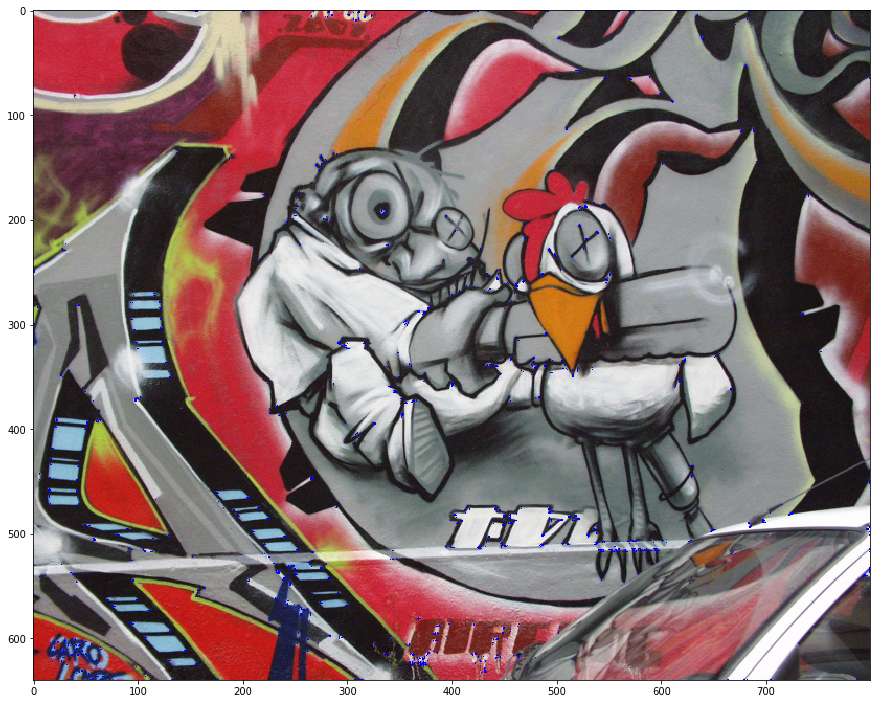

In [11]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 
img = cv.imread('graffiti_01.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

img[dst>0.02*dst.max()]=[255,0,0]
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# END OF YOUR CODE

plt.imshow(img)

<h4>Shi-Tomasi Corner Detector</h4>
Shi and Tomasi made an improvement to the original corner detector. <a href="http://aishack.in/tutorials/shitomasi-corner-detector/">Read here</a> what the improvement is about.

<strong style="color: red">Programming Task: Shi-Tomasi Corner Detector</strong>

Read about the Shi-Tomasi corner detector in  <a href="https://docs.opencv.org/3.4.1/d8/dd8/tutorial_good_features_to_track.html">OpenCV's manuals</a>.
Apply the corner detector to the image <code>graffiti_01.png</code> and <code>x-ray-hand-1.jpg</code> selecting suitable parameters. Visualize the result by drawing small crosses or circles at the corners.


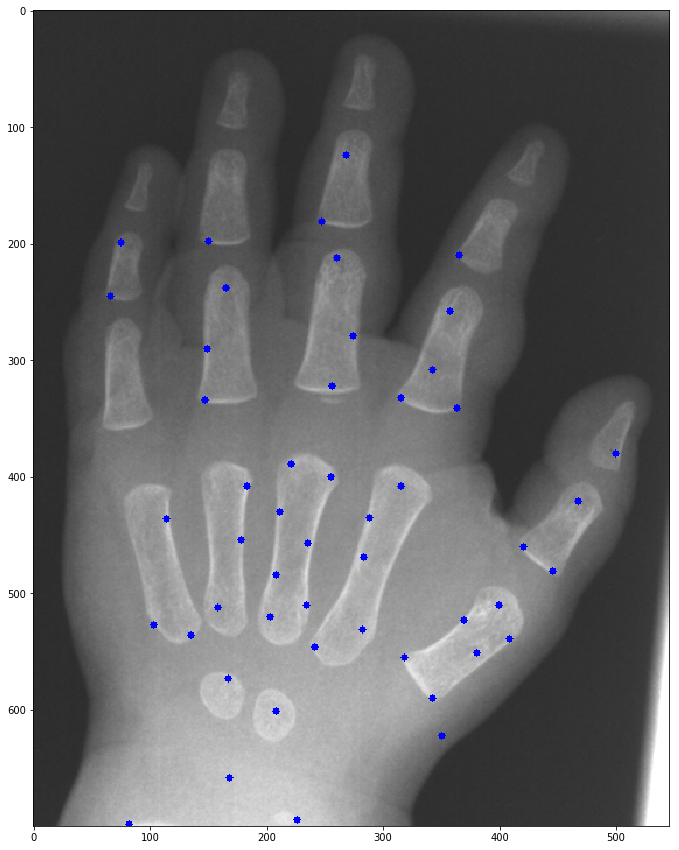

In [2]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 
img1 = cv.imread('graffiti_01.png')
img2 = cv.imread('x-ray-hand-1.jpg')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

corners1 = cv.goodFeaturesToTrack(gray1,50,0.01,10)
corners2 = cv.goodFeaturesToTrack(gray2,50,0.01,30)

for corner in corners1:
    x,y = corner.ravel()
    cv.circle(img1,(x,y),3,(255,0,0),-1)

for corner in corners2:
    x,y = corner.ravel()
    cv.circle(img2,(x,y),3,(255,0,0),-1)
    
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
    
# END OF YOUR CODE

plt.imshow(img1)
plt.imshow(img2)

<strong style="color: red">Programming Task: Corners with sub-pixel accuracy</strong>

Sometimes, you may need to find the corners with maximum accuracy. OpenCV comes with a function cornerSubPix() which further refines the corners detected with sub-pixel accuracy. The function iterates to find the sub-pixel accurate location of corners or radial saddle points.

Extend your implementation of Shi-Tomasi detector with <code>cornerSubPix()</code>. Process both
images <code>graffiti_01.png</code> and <code>x-ray-hand-1.jpg</code> with suitable parameters. Use the following line of code as the termination criteria:

<pre>
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
</pre>

What is the difference to the previous results? Can you explain?

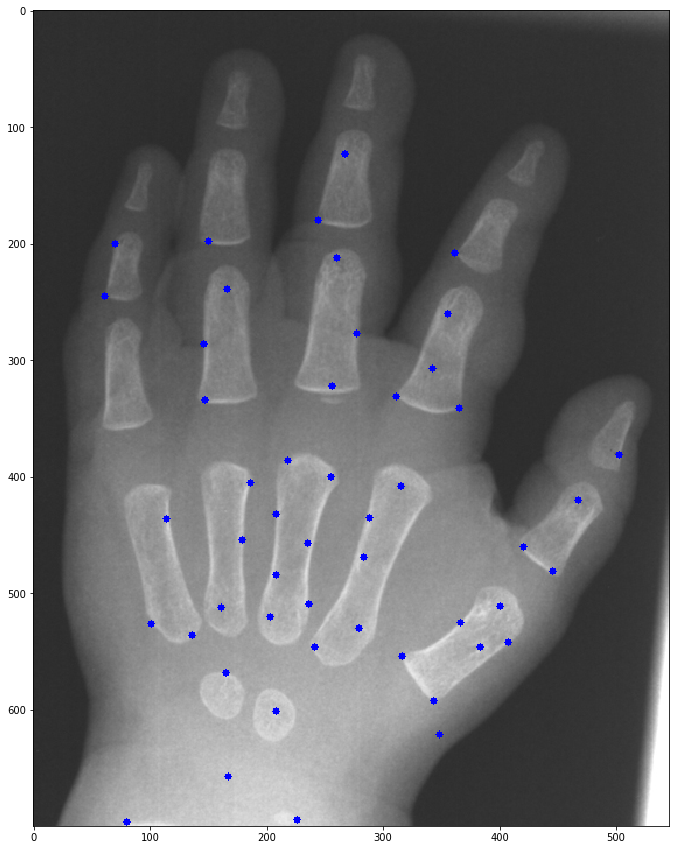

In [3]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 
img1 = cv.imread('graffiti_01.png')
img2 = cv.imread('x-ray-hand-1.jpg')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

corners1 = cv.goodFeaturesToTrack(gray1,50,0.01,10)
corners2 = cv.goodFeaturesToTrack(gray2,50,0.01,30)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
cornersRef1 = cv.cornerSubPix(gray1,corners1,(5,5),(-1,-1),criteria)
cornersRef2 = cv.cornerSubPix(gray2,corners2,(5,5),(-1,-1),criteria)

for corner in cornersRef1:
    x,y = corner.ravel()
    cv.circle(img1,(x,y),3,(255,0,0),-1)

for corner in cornersRef2:
    x,y = corner.ravel()
    cv.circle(img2,(x,y),3,(255,0,0),-1)
    
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
# END OF YOUR CODE

plt.imshow(img1)
plt.imshow(img2)

<a name="task2"></a>
<h3 style="color: red">Task 2: SIFT, SURF and FAST</h3>

All feature detectors observed above are rotation-invariant, which means, even if the image is rotated, we can find the same corners. However, a corner may not be recognized such if the image is scaled. A corner in a small image within a small window is flat when it is zoomed in the same window. Therefore, the Harris corner detector is not scale-invariant.

The question, of course, is now how to detect scale-invariant local features? A naïve approach would be to compare descriptors in an exhaustive multi-scale space. However, this approach probably wouldn't really work in practice.

<h4>SIFT</h4>

In 1999, Lowe came up with a new scale-invariant algorithm, known as SIFT, which extracts key-points and computes their descriptors. SIFT can robustly identify objects even among clutter and under partial occlusion, because the
SIFT feature descriptor is invariant to uniform scaling, orientation, illumination changes, and partially invariant to affine distortion. Key locations are defined as maxima and minima of the result of difference of Gaussians function applied in scale space to a series of smoothed and resampled images. Low contrast candidate points and edge
response points along an edge are discarded. Dominant orientations are assigned to localized key-points.
These steps ensure that the key-points are more stable for matching and recognition.

For an in-depth explanation on how the SIFT algorithm works, refer to <a href="http://www.aishack.in/tutorials/sift-scale-invariant-feature-transform-introduction/">AI Shack's tutorial SIFT: Theory and Practice</a>.

<h4>SURF</h4>
SIFT algorithm was rather slow and its speed-up was proposed in 2006 by Bay, Tuytelaars and Van Gool. In SIFT, Lowe approximated Laplacian of Gaussian with Difference of Gaussian for finding scale-space. SURF goes a little further and approximates LoG with Box Filter. One big advantage of this approximation is that, convolution with box filter can be easily calculated with the help of integral images. And it can be done in parallel for different scales.
Besides that, SURF relies on the determinant of the Hessian matrix for both scale and location.

<h4>FAST</h4>
SURF offers a good sped-up to the SIFT algorithm, however, it is still not fast enough for real-time applications. FAST algorithm was proposed by Rosten and Drummond in 2006. The feature detection works as follows:

<ol>
    <li>Select a pixel $p$ in the image which is to be identified as an interest point or not. Let its intensity
be $I_p$.</li>
    <li>Select appropriate threshold value $t$.</li>
    <li>Consider a circle of 16 pixels around the pixel under test.</li>
    <li>Now the pixel $p$ is a corner if there exists a set of $n$ contiguous pixels in the circle (of 16 pixels)
which are all brighter than $I_p + t$, or all darker than $I_p − t$. The value of $n$ was chosen to be 12.</li>
</ol>

    
<strong style="color: red">Programming Task: SIFT, SURF and FAST</strong>

SIFT used to be included into the official OpenCV distribution before the version 3.0. It was removed in the latest version due to the fact that this algorithm is known to be patented. However, it is still possible to use it in the community version of OpenCV (<a href="https://github.com/opencv/opencv_contrib">https://github.com/opencv/opencv_contrib</a>). This Jupyter Notebook has the community version installed, so you don't need to worry about any installation issues. The same holds for FAST and SURF.

Apply the SIFT, SURF and FAST detector to the images <code>graffiti_01.png</code> and <code>x-ray-hand-1.jpg</code>. Visualize the found keypoints.
You can find the corresponding tutorials here:

<ul>
    <li><a href="https://docs.opencv.org/3.4.1/da/df5/tutorial_py_sift_intro.html">SIFT</a></li>
    <li><a href="https://docs.opencv.org/3.4.1/df/dd2/tutorial_py_surf_intro.html">SURF</a></li>
    <li><a href="https://docs.opencv.org/3.4.1/df/d0c/tutorial_py_fast.html">FAST</a></li>
</ul>

Compare your results with Fig. 1d and Fig. 2d.

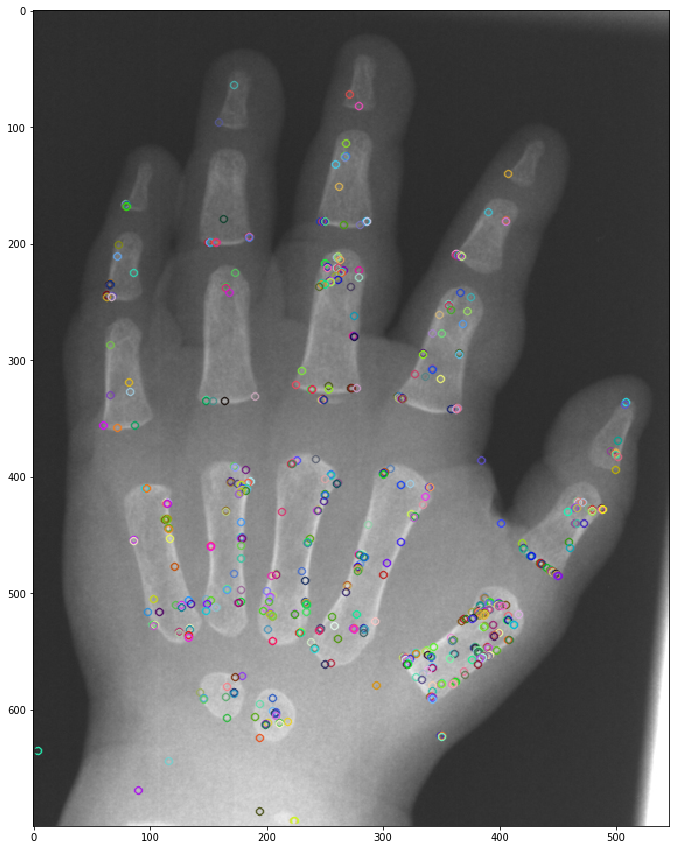

In [4]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 
img1 = cv.imread('graffiti_01.png')
img2 = cv.imread('x-ray-hand-1.jpg')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

sift = cv.xfeatures2d.SIFT_create()
kp_sift1 = sift.detect(gray1,None)
kp_sift2 = sift.detect(gray2,None)
img1_sift = cv.drawKeypoints(gray1,kp_sift1,img1)
img2_sift = cv.drawKeypoints(gray2,kp_sift2,img2)

surf = cv.xfeatures2d.SURF_create(10000)
kp_surf1, des1 = surf.detectAndCompute(gray1,None)
kp_surf2, des2 = surf.detectAndCompute(gray1,None)
img1_surf = cv.drawKeypoints(gray1,kp_surf1,img1)
img2_surf = cv.drawKeypoints(gray2,kp_surf2,img2)

fast = cv.FastFeatureDetector_create()
fast.setNonmaxSuppression(0)
kp_fast1 = fast.detect(gray1,None)
kp_fast2 = fast.detect(gray2,None)
img1_fast = cv.drawKeypoints(gray1,kp_fast1,img1)
img2_fast = cv.drawKeypoints(gray2,kp_fast2,img2)


# END OF YOUR CODE

plt.imshow(img1_sift)
plt.imshow(img1_surf)
plt.imshow(img1_fast)
plt.imshow(img2_sift)
plt.imshow(img2_surf)
plt.imshow(img2_fast)

<a name="task3"></a>
<h3 style="color: red">Task 3: Blobs</h3>

A blob is a group of connected pixels in an image that share some common property. OpenCV
offers a convenient way to detect blobs and filter them based on different characteristics. A class
<code>SimpleBlobDetector</code> is provided for that purpose. The class implements a simple algorithm for extracting blobs from an image:
<ol>
    <li>Convert the source image to binary image by applying thresholding with several thresholds from
        <code>minThreshold</code> (inclusive) to <code>maxThreshold</code> (exclusive) with distance thresholdStep between neighboring thresholds.</li>
    <li>Extract connected components from every binary image by <code>findContours</code> and calculate their cen-
ters.</li>
    <li>Group centers from several binary images by their coordinates. Close centers form one group that
        corresponds to one blob, which is controlled by the <code>minDistBetweenBlobs</code> parameter.</li>
    <li>From the groups, estimate final centers of blobs and their radiuses and return as locations and sizes
    of keypoints.</li>
</ol>

<strong style="color: red">Programming Task: Simple Blobs</strong>

Apply the simple blob detector on the images <code>mdck0.jpg</code> and <code>mdck1.jpg</code>. Try to get as many (or more) cells detected as in the Fig. 3. You can find introductory tutorials to using OpenCV's simple blob detector with Python <a href="https://www.makehardware.com/2016/05/19/blob-detection-with-python-and-opencv/">here</a> and <a href="https://www.learnopencv.com/blob-detection-using-opencv-python-c/">here</a>.

<strong>Hint:</strong> besides parameters adjustment, as explained in the tutorials, some prior preprocessing might needed. It could be a good idea to perform channel splitting at first.

Mark the detected blobs and print out the number of detected blobs.

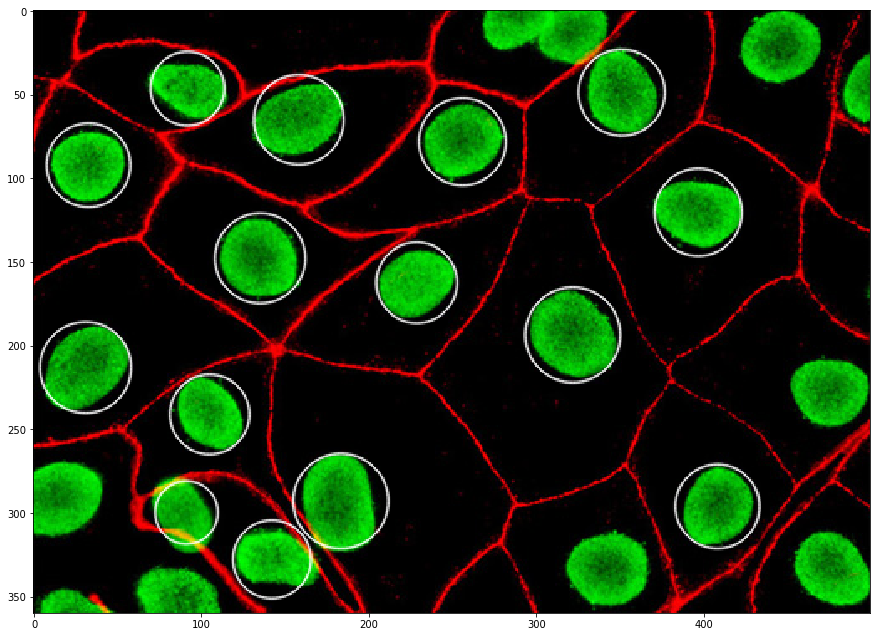

In [5]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 

img1 = cv.imread('mdck0.jpg')
img2 = cv.imread('mdck1.jpg')

smooth1 = cv.GaussianBlur(img1, (3, 3), 0)
smooth2 = cv.GaussianBlur(img2, (3, 3), 0)
hsv1 = cv.cvtColor(smooth1, cv.COLOR_BGR2HSV)
hsv2 = cv.cvtColor(smooth2, cv.COLOR_BGR2HSV)
    
# define range of purple color in HSV
purpleMin1 = (110,50,10)
purpleMax1 = (160, 255, 255)
purpleMin2 = (60,50,10)
purpleMax2 = (100, 255, 255)
    
# Sets pixels to white if in blue range, else will be set to black
mask1 = cv.inRange(hsv1, purpleMin1, purpleMax1)
mask1 = cv.dilate(mask1, None, iterations=1)
mask2 = cv.inRange(hsv2, purpleMin2, purpleMax2)
mask2 = cv.dilate(mask2, None, iterations=1)
    
params = cv.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 30
     
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
     
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.1
     
# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.2

detector = cv.SimpleBlobDetector_create(params)
reversemask1 = 255-mask1
keypoints = detector.detect(reversemask1)
img1 = cv.drawKeypoints(img1, keypoints,np.array([]), (0,255,0), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

reversemask2 = 255-mask2
keypoints = detector.detect(reversemask2)
img2 = cv.drawKeypoints(img2, keypoints,np.array([]), (255,255,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# END OF YOUR CODE

plt.imshow(img1)
plt.imshow(img2)

<a name="task4"></a>
<h3 style="color: red">Task 4: Hough Transform</h3>

The Hough transform is a feature extraction technique the purpose of which is to find imperfect instances
of objects within a certain class of shapes by a voting procedure. This voting procedure is carried
out in a parameter space, from which object candidates are obtained as local maxima in a so-called
accumulator space that is explicitly constructed by the algorithm for computing the Hough transform.
The classical Hough transform was concerned with the identification of lines in the image, but later the
Hough transform has been extended to identifying positions of arbitrary shapes, most commonly circles
or ellipses.

OpenCV offers two versions of Hough line transform: the original one and a probabilistic one. The probabilistic Hough line transform is more efficient implementation of the Hough line transform. It returns as output the extremes of the detected lines $(x_0, y_0, x_1, y_1)$

<strong style="color: red">Programming Task: Hough Transform</strong>

Apply Hough transform to the <code>color_wound.jpg</code> to detect lines between the color patches in the color card. Make sure to binarize your initial image using Canny edge detection with appropriate
parameters. OpenCV's tutorial on the Hough line transform <a href="https://docs.opencv.org/3.4.1/d9/db0/tutorial_hough_lines.html">can be found here</a>.

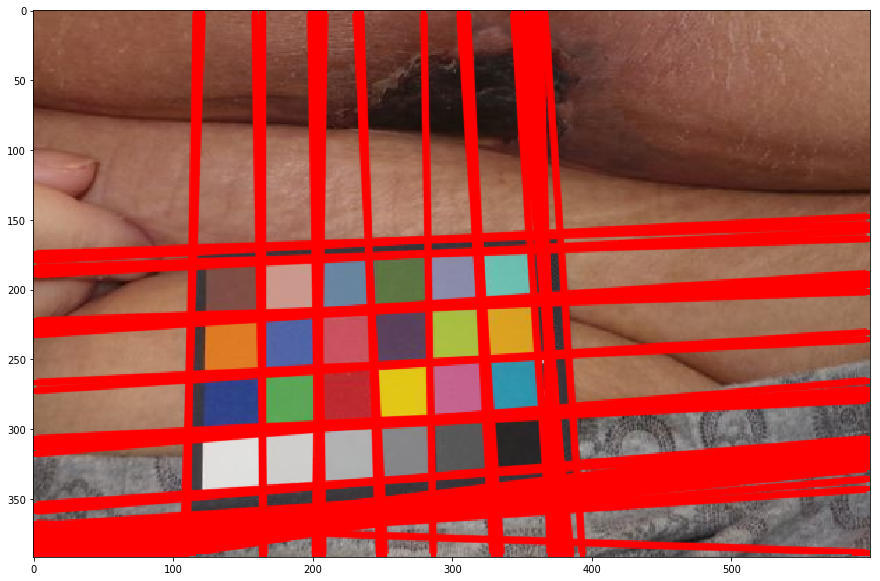

In [6]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 
img = cv.imread('color_wound.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.Canny(gray, 150, 200, apertureSize = 3)
    
lines = cv.HoughLines(dst, 1, np.pi / 180, 80, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(img, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# END OF YOUR CODE

plt.imshow(img)

<strong style="color: red">Programming Task: Probabilistic Hough Transform</strong>

Apply probabilistic Hough transform to the <code>color_wound.jpg</code> chosing appropriate parameters which will allow a better detection of the lines in the card. Try to minimize the number of outliers (lines detected outside the card).

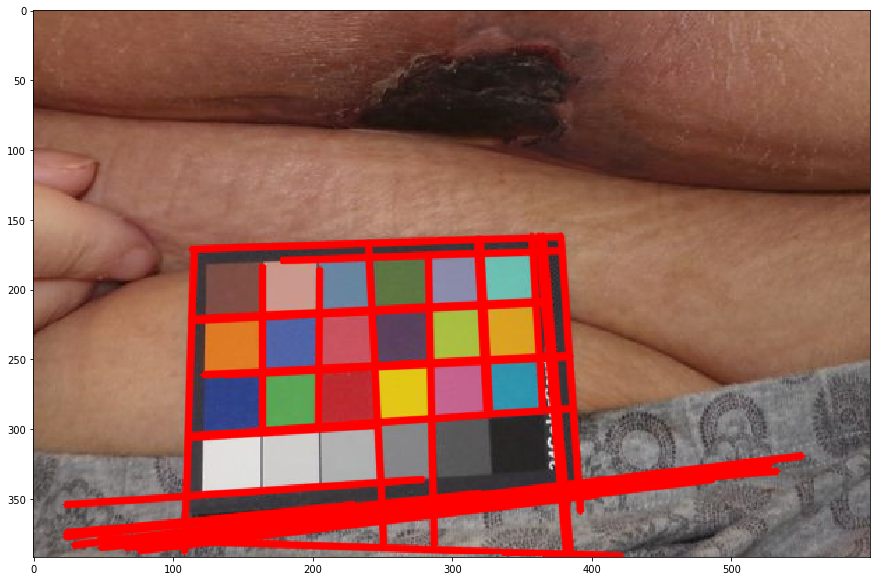

In [7]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 
img = cv.imread('color_wound.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.Canny(gray, 150, 200, apertureSize = 3)
    
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 70, None, 100, 60)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# END OF YOUR CODE

plt.imshow(img)

The Hough circle transform works in a roughly analogous way to the Hough line transform.
In the line detection case, a line was defined by two parameters $(\rho, \theta)$. In the circle case, we need three
parameters to define a circle: $C: (x_{center}, y_{center},\rho)$, where $(x_{center}, y_{center})$  define the center position and $\rho$ is the radius, which allows us to completely define a circle. For sake of efficiency, OpenCV implements a detection method slightly trickier than the standard Hough transform: The Hough gradient method.

<strong style="color: red">Programming Task: Hough Transform for Circles</strong>

Apply circle detection to the images <code>DH4_AF_CCD_B.jpg</code> and <code>DH4_SF_ICD_B.jpg</code>. Select the parameters in such way so that the same set of parameters would work for both of the images. A hint: apply median blur prior to Hough transform. Adjust the parameters to detect the pupil in the image <code>pupil_detection.bmp</code>. The results shall be similar to Figure 5. Now try to detect the iris.
OpenCV's tutorial on the Hough circle transform <a href="https://docs.opencv.org/3.4.1/d4/d70/tutorial_hough_circle.html">can be found here</a>.

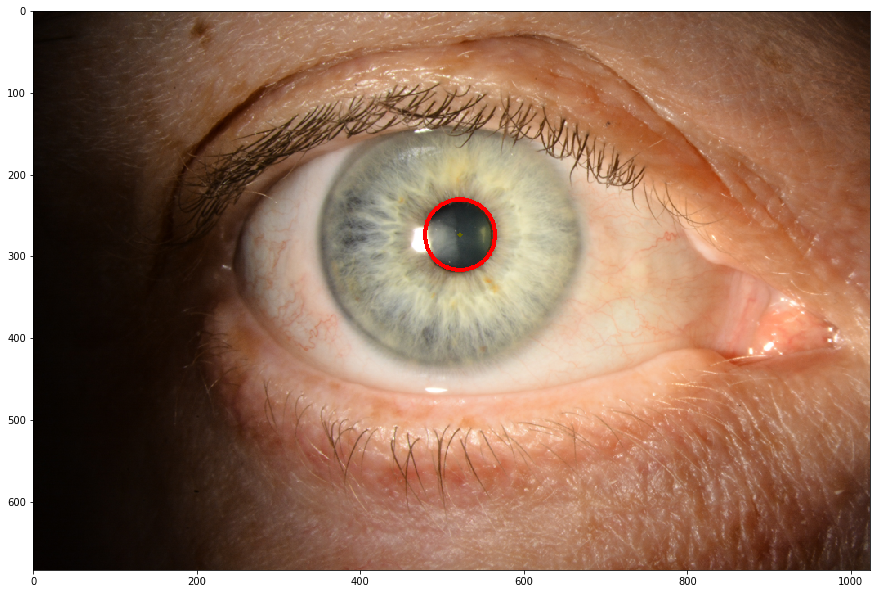

In [8]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 
#img = cv.imread('DH4_AF_CCD_B.jpg')
#img = cv.imread('DH4_SF_ICD_B.jpg')
img = cv.imread('pupil_detection.bmp')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 5)

rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=30, maxRadius=50)
    
    
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(img, center, radius, (0, 0, 255), 3)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# END OF YOUR CODE

plt.imshow(img)

<strong style="color: red">Bonus Programming Task: Own Implementation of the Hough Transform for Circles</strong>

As a bonus task, now that you are knowledgeable about the Hough transform, write your own implementation of the Circle Hough transform and find circles in the two images <code>DH4_AF_CCD_B.jpg</code> and <code>DH4_SF_ICD_B.jpg</code>. Remember that a circle can be represented by the following equation:

<strong>Hint:</strong> A circle can be parameterized by the following equation:$$ ( x − a )^2 + ( y − b )^2 = r^2 $$
This would give us three parameters: $a$, $b$, and $r$ and therefore a 3-dimensional parameter space. Both  computation  and  memory  requirements increase exponentially with the number of parameters. 

Without gradient information, all values $(a,b)$ lying on the cone given by the circle equation are incremented. With
the gradient information, we only need to increment points on an arc centered at $(a,b)$:

$$a =  x  + r \cos\phi, b=y+r\sin\phi$$
where $\phi$ is the gradient angle returned by the edge operator.

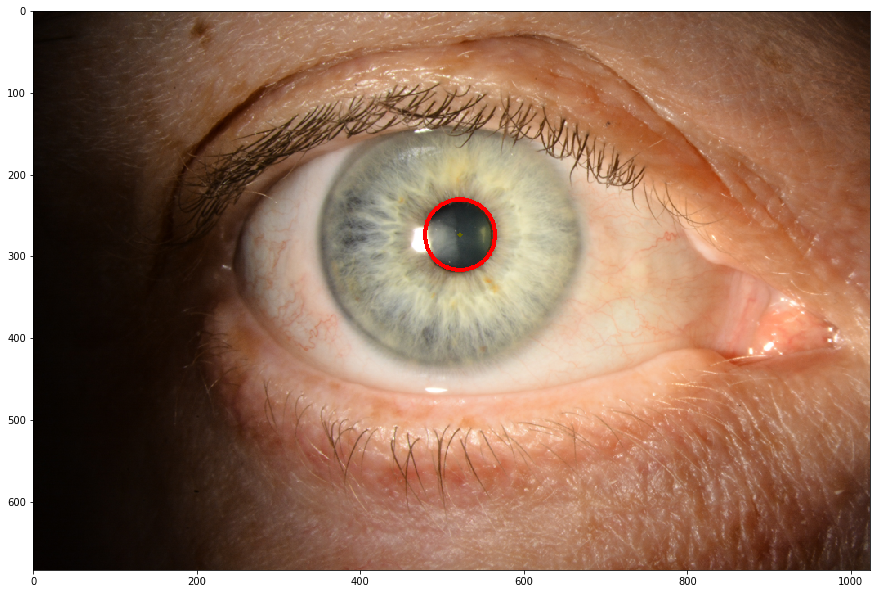

In [9]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

# YOUR CODE HERE 

# END OF YOUR CODE

plt.imshow(img)

<img src="features-graffiti.png" />
<strong>Figure 1.</strong> Features detected in the image <code>graffiti_01.png</code>: (a) Harris corner detector; (b) Shi-Tomasi; (c) Corners with subpixel accuracy; (d) FAST.

<img src="features-hand.png" />
<strong>Figure 2.</strong> Features detected in the image <code>x−ray−hand−1.jpg</code>: (a) Harris corner detector; (b) Shi-Tomasi; (c) Corners with subpixel accuracy; (d) FAST.

<img src="blobs.png" />
<strong>Figure 3.</strong> Detected blobs: (a) 13 blobs detected; (b) 16 blobs detected.

<img src="hough-lines.png" />
<strong>Figure 4.</strong> Line detection using Hough transform: (a) original; (b) probabilistic.

<img src="hough-circles.png" />
<strong>Figure 5.</strong> Circle detection using Hough transform: (a) tooth 1; (b) tooth 2; (c) eye pupil.